# 部位のU値をもとに壁体構成を与える

## 部位のU値から壁体構成を決定する方法
- 屋根・天井、外壁、床、界壁、界床、界床（天井）の構成は、入力値である部位種別の熱貫流率と極力一致するよう、構造種別に応じ、以下の構成における断熱材の厚さを、0mm以上の範囲で、1mm単位で切り捨てて調整する。
- 熱貫流率の入力値が大きい場合、断熱材の厚さを0mmとしても入力値の熱貫流率を再現できないことがあるが、この場合はその差を許容する。

- 屋根・天井壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.040 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| せっこうボード | 0.0095 | 0.22 | 0.043 | 830 |
| Ri | - | - | 0.090 | 0 |

- 外壁壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.040 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| せっこうボード | 0.0095 | 0.22 | 0.043 | 830 |
| Ri | - | - | 0.110 | 0 |

- 床壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.040 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| 合板 | 0.012 | 0.16 | 0.075 | 720 |
| Ri | - | - | 0.150 | - | - |

- 界床（天井）壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.090 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| せっこうボード | 0.0095 | 0.22 | 0.043 | 830 |
| Ri | - | - | 0.090 | 0 |

- 界壁壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.110 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| せっこうボード | 0.0095 | 0.22 | 0.043 | 830 |
| Ri | - | - | 0.110 | 0 |

- 界床壁体構成（木造、鉄骨造）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.150 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| 合板 | 0.012 | 0.16 | 0.075 | 720 |
| Ri | - | - | 0.150 | - | - |


- 屋根・天井壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.040 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.090 | 0 |

- 外壁壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.040 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.110 | 0 |

- 床壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.040 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.150 | - | - |

- 界床（天井）壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.090 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.090 | 0 |

- 界壁壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.110 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.110 | 0 |

- 界床壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ[m] | 熱伝導率[W/(m・K)] | 熱抵抗[（㎡K・W）] | 容積比熱[J/（L・K）] |
|-------------|-------------|-------------|-------------|
| Ro | - | - | 0.150 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.150 | - | - |

### Input

```
data = {
    'structure'     : # 構造種別 String値、以下のいずれか
    　　　　　　　　　　# 'wood'（木造）/ 'rc'（鉄筋コンクリート造等）/'steel'（鉄骨造）/'other'（その他/不明）
    'type'          : # 部位種別 String値、以下のいずれか
    　　　　　　　　　　# 'ceiling'（屋根・天井）/'wall'（外壁）/'floor'（床）/
                      # 'BoundaryWall'（界壁）/'BoundaryFloor'（界床） /'BoundaryCeiling'（天井（界床））
    'Ua'            : # 平均熱貫流率($[W/(m^2・K)]$)
}
```

### Output

```
data = 
    'Layer'           # 層構成 2層
        [{
        'material'  : # 部材名称
        'd'         : # 厚さ(m)
        'λ'         : # 熱伝達率(W/(m・K))
        'Cρ'        : # 容積比熱(J/(m^3・K))
        }]
```

関数の指定

In [22]:
import math

def convert_UtoDetailSpecification(d1):
    if (d1['structure']=='wood' or d1['structure']=='steel' or d1['structure']=='other') and d1['type']=='ceiling':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.040+0.0095/0.22+0.090))*0.045)*1000))/1000
        Layer= [{'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13}, 
                 {'material':'GPB','d':0.0095,'λ':0.22,'Cρ':830}]    
    elif (d1['structure']=='wood' or d1['structure']=='steel' or d1['structure']=='other') and d1['type']=='wall':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.040+0.0095/0.22+0.110))*0.045)*1000))/1000
        Layer= [{'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13},
                 {'material':'GPB','d':0.0095,'λ':0.22,'Cρ':830}]
    elif (d1['structure']=='wood' or d1['structure']=='steel' or d1['structure']=='other') and d1['type']=='floor':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.040+0.012/0.16+0.150))*0.045)*1000))/1000
        Layer= [{'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13},
                 {'material':'PED','d':0.012,'λ':0.16,'Cρ':720}] 
    elif (d1['structure']=='wood' or d1['structure']=='steel' or d1['structure']=='other') and d1['type']=='BoundaryWall':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.090+0.0095/0.22+0.090))*0.045)*1000))/1000
        Layer= [{'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13}, 
                 {'material':'GPB','d':0.0095,'λ':0.22,'Cρ':830}]    
    elif (d1['structure']=='wood' or d1['structure']=='steel' or d1['structure']=='other') and d1['type']=='BoundaryFloor':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.110+0.0095/0.22+0.110))*0.045)*1000))/1000
        Layer= [{'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13},
                 {'material':'GPB','d':0.0095,'λ':0.22,'Cρ':830}]
    elif (d1['structure']=='wood' or d1['structure']=='steel' or d1['structure']=='other') and d1['type']=='BoundaryCeiling':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.150+0.012/0.16+0.150))*0.045)*1000))/1000
        Layer= [{'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13},
                 {'material':'PED','d':0.012,'λ':0.16,'Cρ':720}] 
    elif d1['structure']=='rc' and d1['type']=='ceiling':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.040+0.12/1.6+0.090))*0.045)*1000))/1000
        Layer= [{'material':'RC','d':0.120,'λ':1.6,'Cρ':2000}, 
                 {'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13}]    
    elif d1['structure']=='rc' and d1['type']=='wall':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.040+0.12/1.6+0.110))*0.045)*1000))/1000
        Layer= [{'material':'RC','d':0.120,'λ':1.6,'Cρ':2000},
                 {'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13}]
    elif d1['structure']=='rc' and d1['type']=='floor':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.040+0.12/1.6+0.150))*0.045)*1000))/1000
        Layer= [{'material':'RC','d':0.120,'λ':1.6,'Cρ':2000},
                 {'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13}] 
    elif d1['structure']=='rc' and d1['type']=='BoundaryWall':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.090+0.12/1.6+0.090))*0.045)*1000))/1000
        Layer= [{'material':'RC','d':0.120,'λ':1.6,'Cρ':2000},
                 {'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13}]    
    elif d1['structure']=='rc' and d1['type']=='BoundaryFloor':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.110+0.12/1.6+0.110))*0.045)*1000))/1000
        Layer= [{'material':'RC','d':0.120,'λ':1.6,'Cρ':2000},
                 {'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13}]
    elif d1['structure']=='rc' and d1['type']=='BoundaryCeiling':
        d_insulation=(math.floor(max(0,(1/float(d1['Ua'])-(0.150+0.12/1.6+0.150))*0.045)*1000))/1000
        Layer= [{'material':'RC','d':0.120,'λ':1.6,'Cρ':2000},
                 {'material':'GW16K','d':d_insulation,'λ':0.045,'Cρ':13}] 
        
    return Layer

関数の実行

In [23]:
convert_UtoDetailSpecification({
    'structure':1,
    'name': 'Sample Wall',
    'type': 2,
    'Ua': 0.538
})

{'Layers': [{'Cρ': 13, 'd': 0.074, 'material': 'GW16K', 'λ': 0.045},
  {'Cρ': 830, 'd': 0.0095, 'material': 'GPB', 'λ': 0.22}]}

U値と断熱材厚の関係のグラフ作成

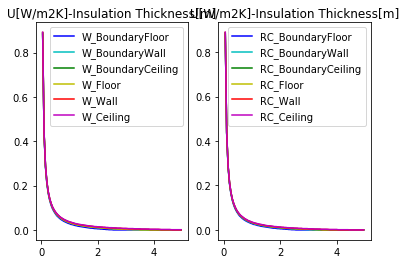

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
x=np.arange(0.05,5,0.05)
y=[[],[],[],[],[],[],[]]
for i in x:
    for j in range(1,7):
        temp=convert_UtoDetailSpecification({'structure':1,'name': 'Sample Wall','type': j,'Ua': i})
        y[j].append(temp['Layers'][0]['d'])        
    
plt.title(r"U[W/m2K]-Insulation Thickness[m]")
plt.plot(x,y[6],'b',label="W_BoundaryFloor")
plt.plot(x,y[5],'c',label="W_BoundaryWall")
plt.plot(x,y[4],'g',label="W_BoundaryCeiling")
plt.plot(x,y[3],'y',label="W_Floor")
plt.plot(x,y[2],'r',label="W_Wall")
plt.plot(x,y[1],'m',label="W_Ceiling")
plt.legend()

plt.subplot(1, 2, 2)
x=np.arange(0.05,5,0.05)
y=[[],[],[],[],[],[],[]]
for i in x:
    for j in range(1,7):
        temp=convert_UtoDetailSpecification({'structure':2,'name': 'Sample Wall','type': j,'Ua': i})
        y[j].append(temp['Layers'][1]['d'])        
    
plt.title(r"U[W/m2K]-Insulation Thickness[m]")
plt.plot(x,y[6],'b',label="RC_BoundaryFloor")
plt.plot(x,y[5],'c',label="RC_BoundaryWall")
plt.plot(x,y[4],'g',label="RC_BoundaryCeiling")
plt.plot(x,y[3],'y',label="RC_Floor")
plt.plot(x,y[2],'r',label="RC_Wall")
plt.plot(x,y[1],'m',label="RC_Ceiling")
plt.legend()